In [408]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [409]:
data_set = pd.read_excel('SAMPLE DATA UPWORK.xlsx')

In [410]:
list_of_groups = []

In [411]:
grouped = data_set.groupby('Horse ID')

In [412]:
for name, group in grouped:
    list_of_groups.append(group)

In [413]:
sns.set_theme(style="darkgrid", palette="dark:#5A9_r")
sns.color_palette("dark:#5A9_r")


[(0.3333333333333333, 0.6666666666666666, 0.6),
 (0.2942864124040944, 0.5634335033836648, 0.5094518193763984),
 (0.2552394914748555, 0.46020034010066313, 0.41890363875279674),
 (0.2161925705456166, 0.3569671768176614, 0.32835545812919514),
 (0.1771456496163777, 0.2537340135346596, 0.2378072775055935),
 (0.1380987286871388, 0.1505008502516578, 0.14725909688199193)]

# Analysis of Temporal Series

Analyzing temporal series data is a robust choice for predicting price movements. The temporal aspect allows the model to capture trends and patterns over time, crucial for understanding how prices evolve. In this context, the sequential nature of the dataset, collected every 3 minutes, aligns with the time-sensitive dynamics of market behavior. By leveraging the historical VOLUME data, the model can potentially uncover correlations and anticipate price shifts. This approach provides a practical framework for forecasting future prices, especially when focused on a specific time window, such as between 0900-1200 hrs GMT, where significant market movements are observed.

# Ploting the Temporal Series
I grouped the data by horse ID and created separate tables for each group, with time as the index. I discarded the other data.
the `list_of_groups` variable is a list of six elements (every horse) here is the graph of Price Back, Price Lay and Volume of the first horse:

<Axes: xlabel='Time', ylabel='value'>

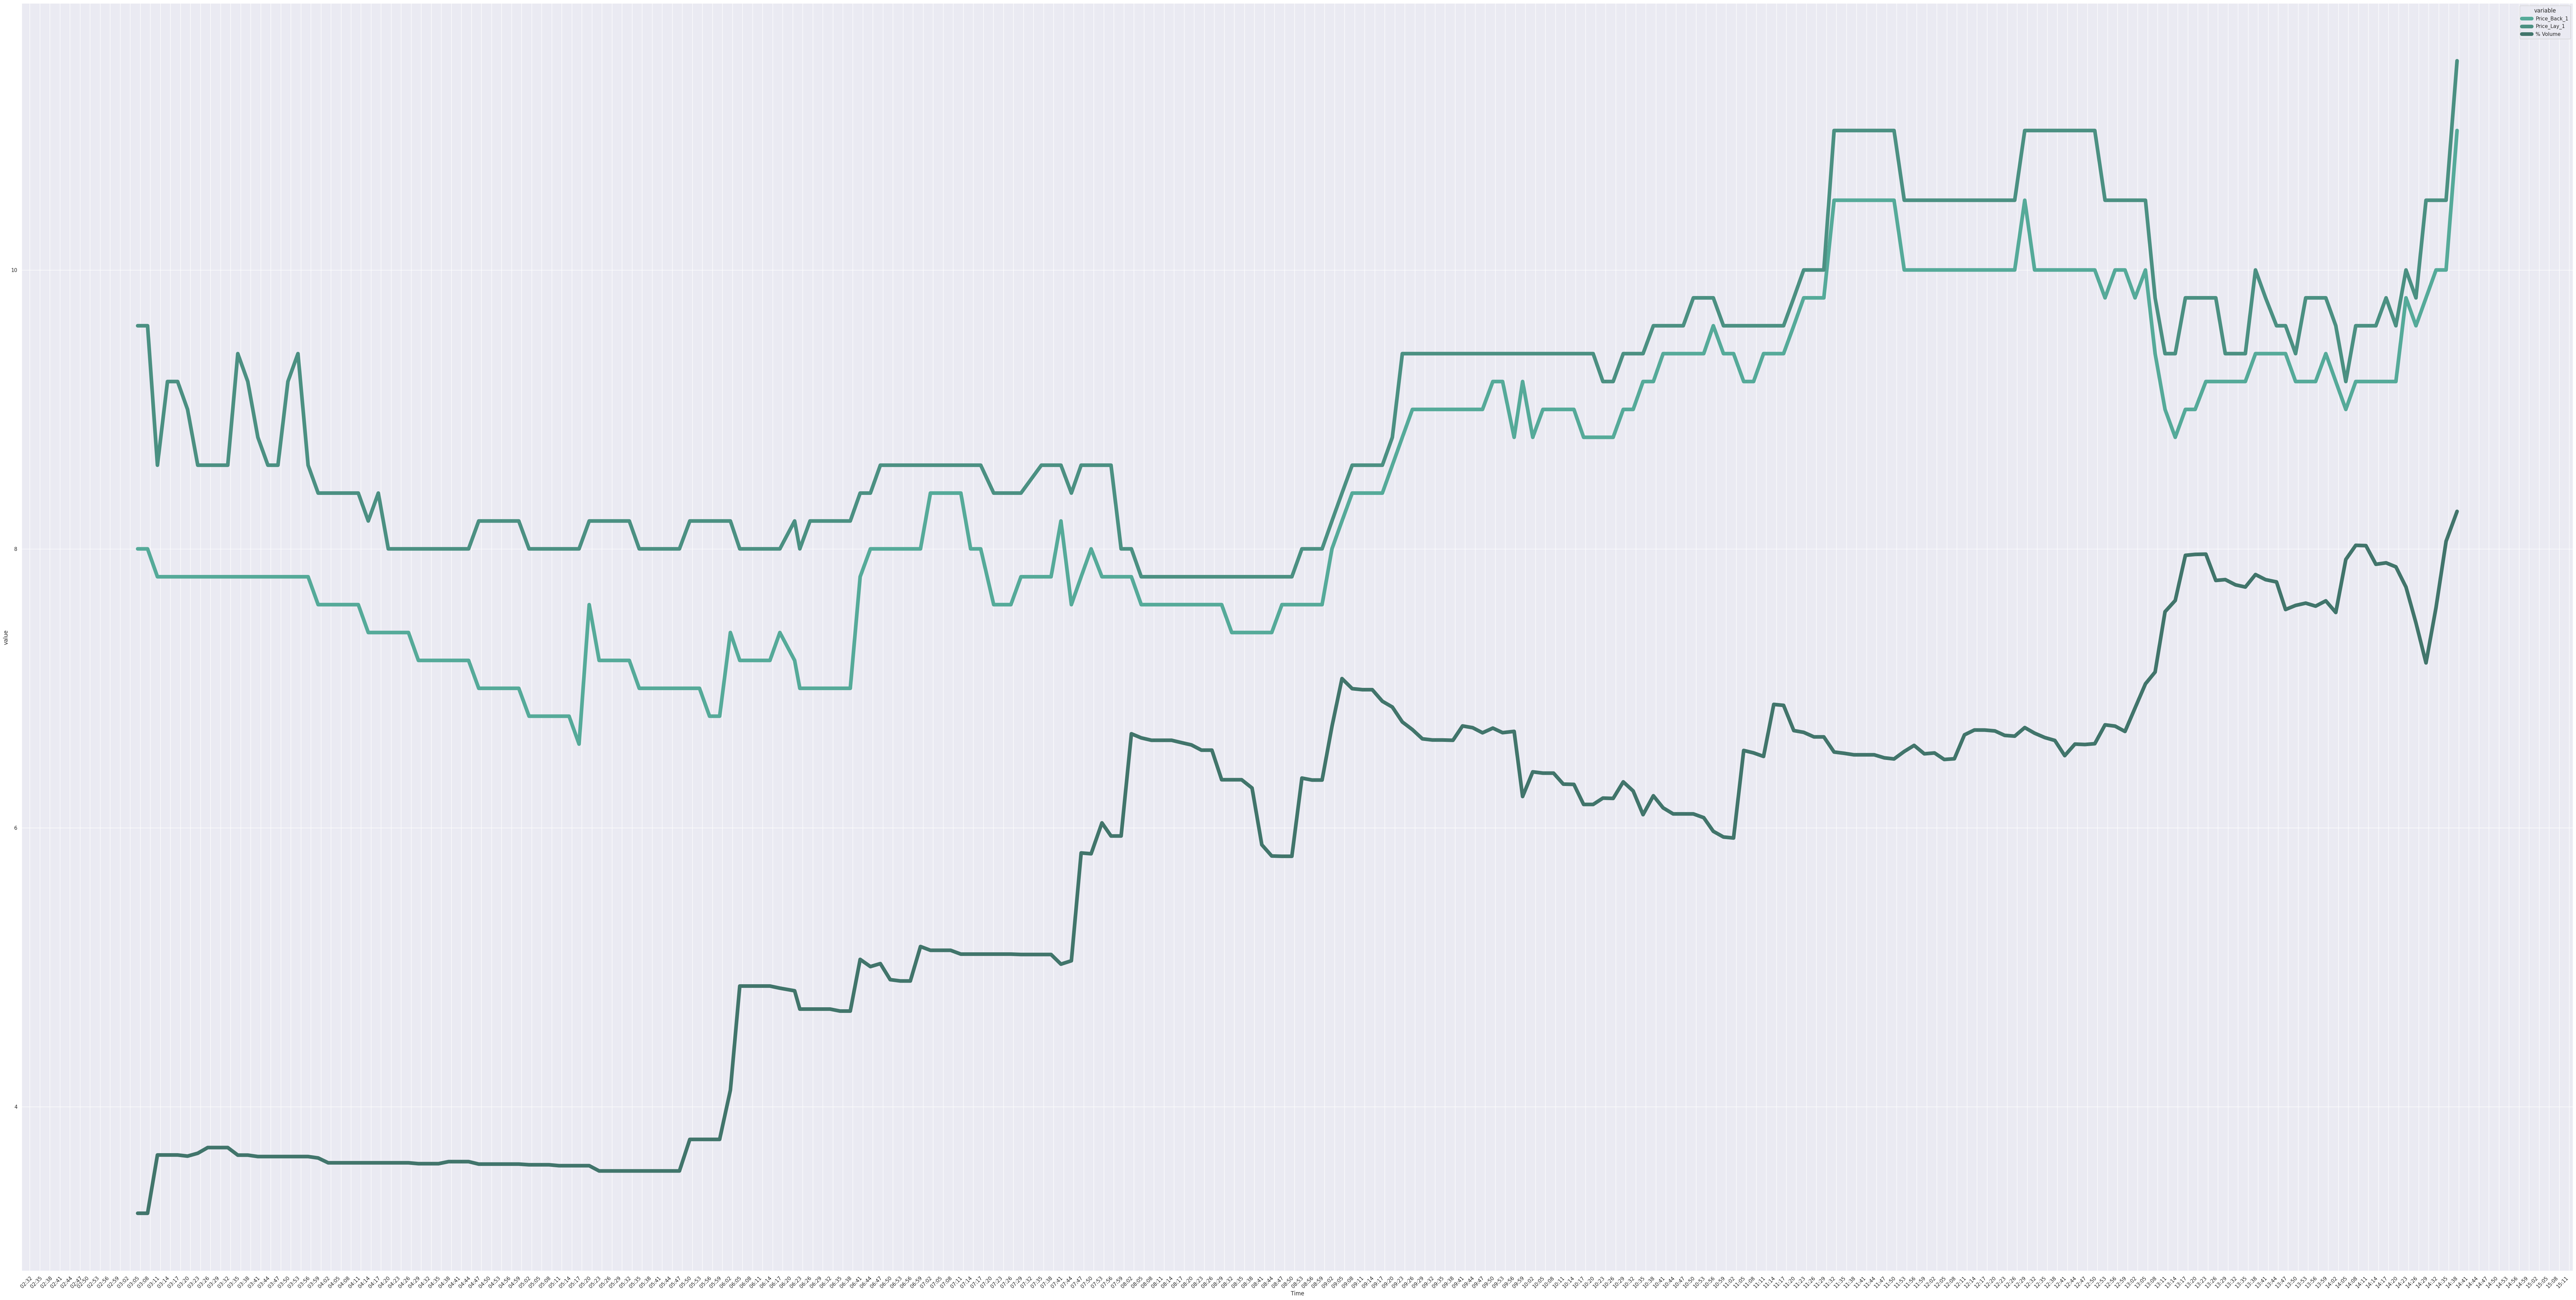

In [414]:
choosed_set = list_of_groups[0][['Time','Price_Back_1', 'Price_Lay_1', '% Volume']]
df_long = pd.melt(choosed_set[:-5], id_vars='Time')
plt.figure(figsize=(100, 50))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor') 
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=3))

sns.lineplot(x='Time', y='value', hue='variable', data=df_long, linewidth=8,)

# Normalizing the data

Normalizing a set of data to have values within the range of $[-1, 1]$ is done to scale and standardize the data. This normalization simplifies comparisons between different datasets and ensures that all values are proportionally represented, preventing certain features from dominating the analysis due to their scale.

In [415]:
def normalize_dataframe(df):
    df_normalized = (2 * (df - df.min())) / (df.max() - df.min()) - 1
    return df_normalized

<Axes: xlabel='Time', ylabel='value'>

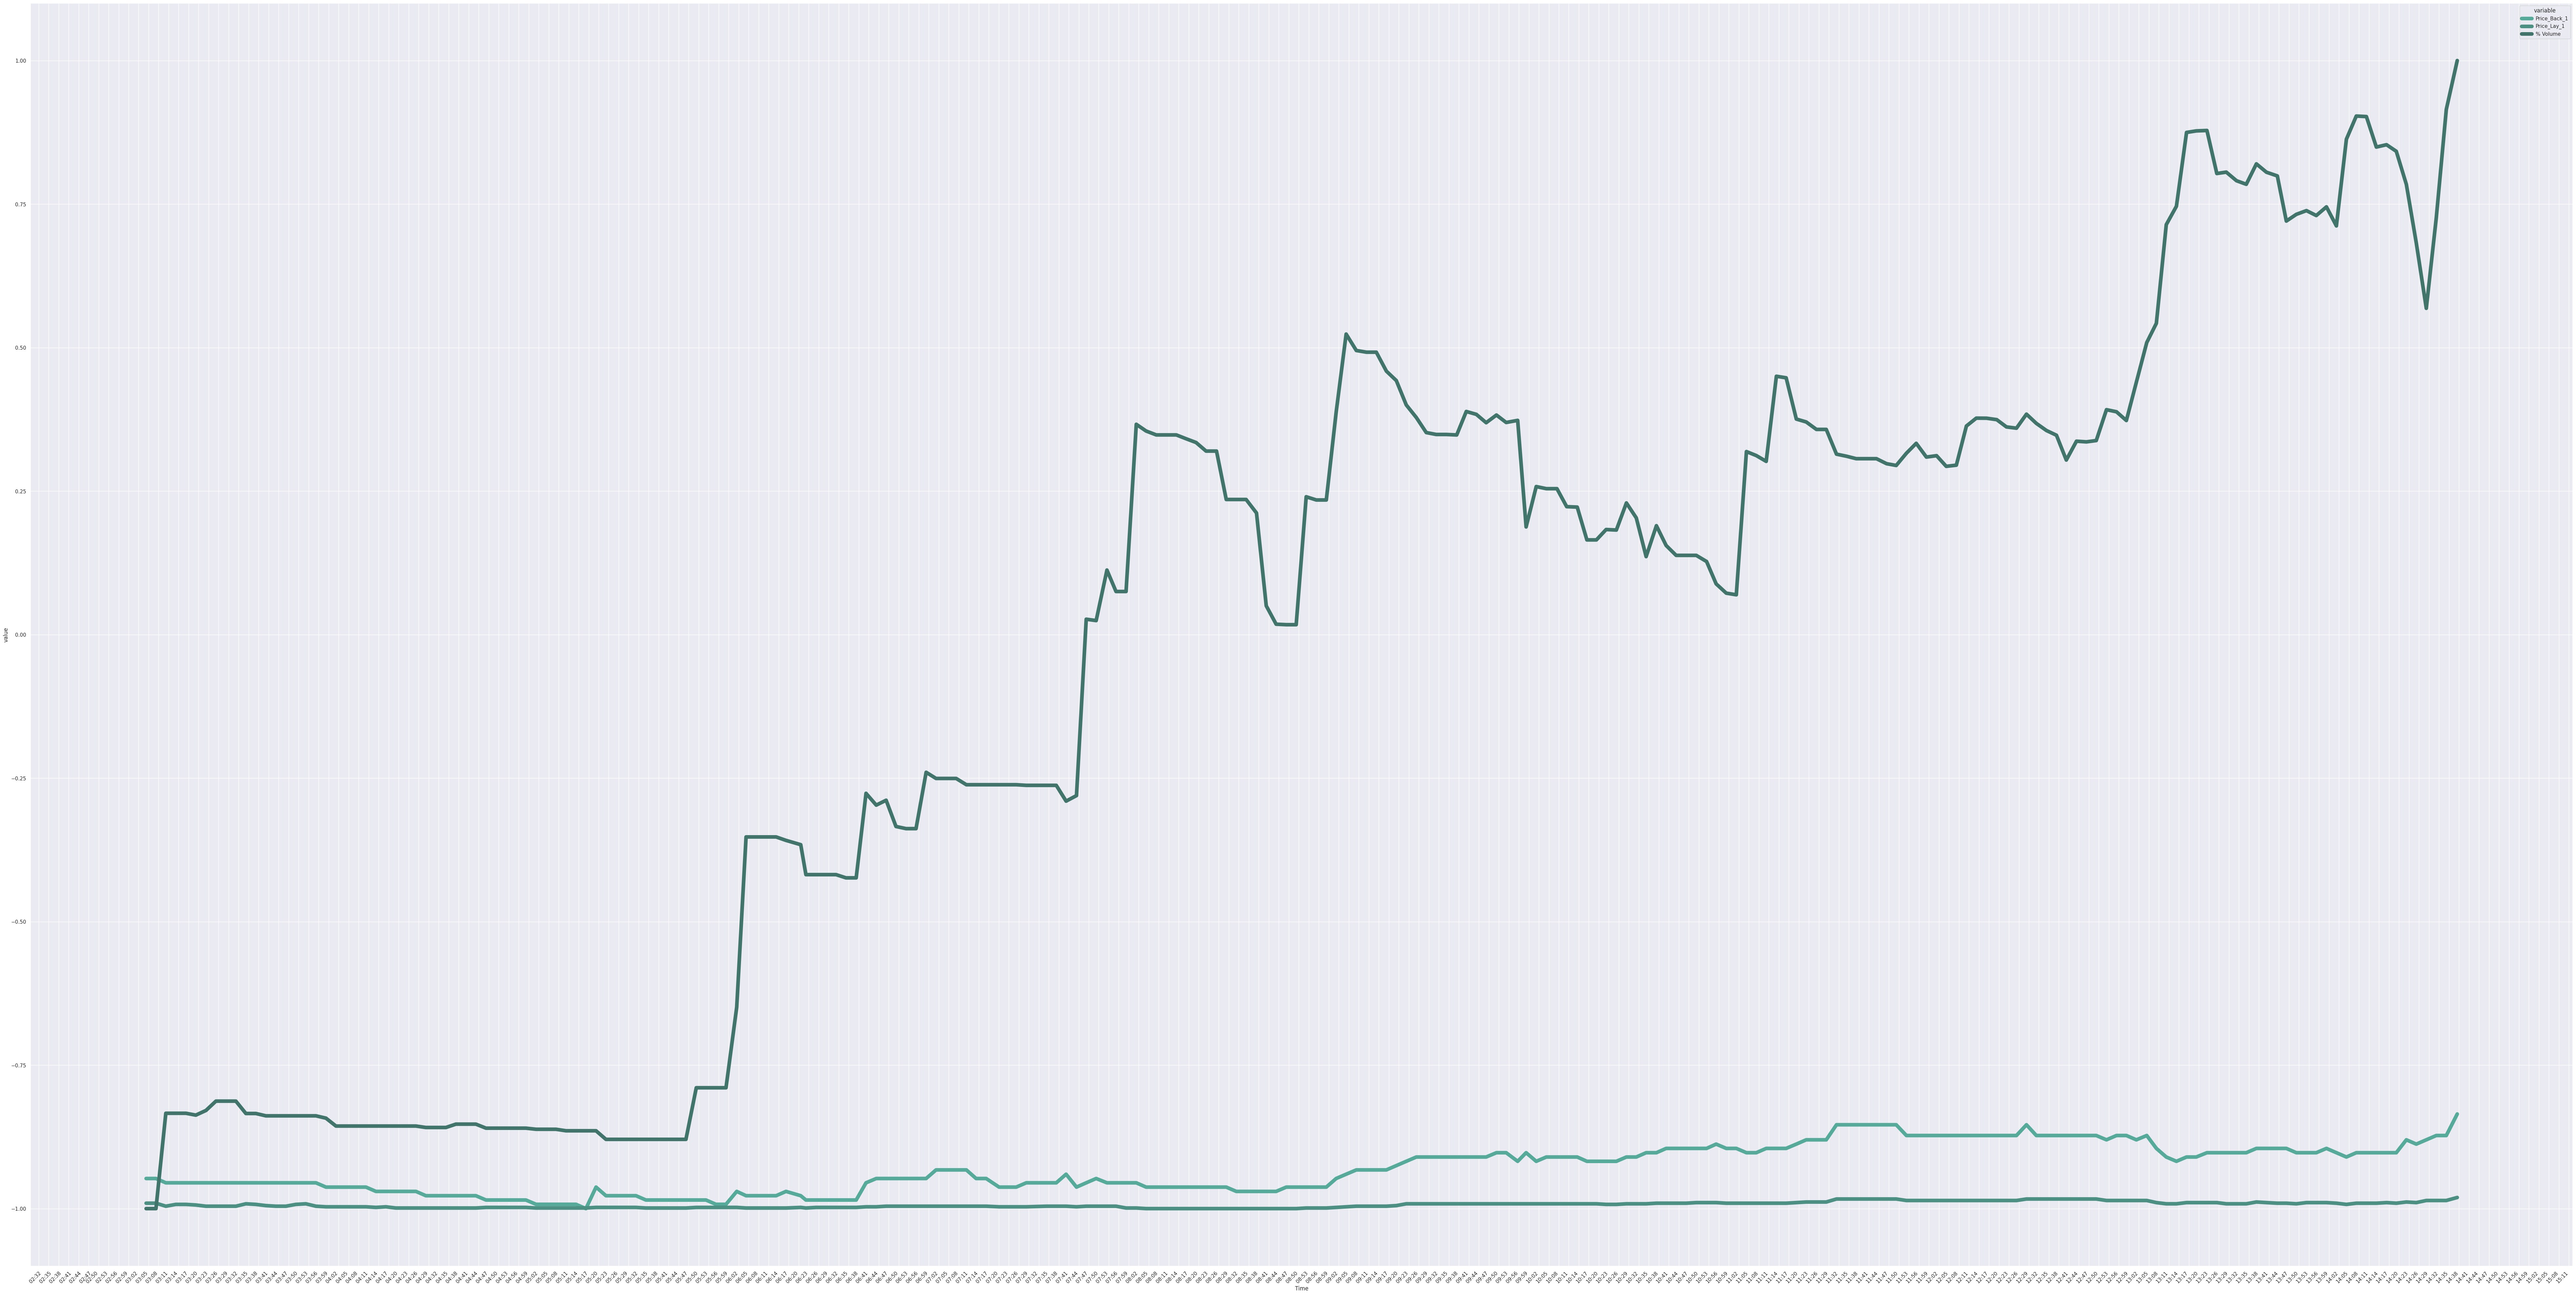

In [416]:
choosed_set = list_of_groups[0][['Time','Price_Back_1', 'Price_Lay_1', '% Volume']]
normalized = normalize_dataframe(choosed_set[['Price_Back_1', 'Price_Lay_1', '% Volume']])
choosed_set.loc[:,['Price_Back_1', 'Price_Lay_1', '% Volume']] = normalized

df_long = pd.melt(choosed_set[:-5], id_vars='Time')
plt.figure(figsize=(100, 50))
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MinuteLocator(interval=3))

sns.lineplot(x='Time', y='value', hue='variable', data=df_long, linewidth=8,)

# Stationarity Test
A stationarity test assesses whether a time series data set exhibits constant statistical properties over time. In simpler terms, it checks if the mean, variance, and other characteristics of the data remain consistent across different time periods. A stationary time series is essential for accurate modeling and forecasting in time series analysis.
In this case I choosed the ADF test.

## ADF Stationarity Test
The ADF test checks for stationarity. 

- Null hypothesis: $(H_0)$ - time series has a unit root (non-stationary). 
- Alternative hypothesis: $(H_1)$ - time series is stationary.

The test statistic is compared to critical values for decision making.

In [417]:
# stationarity test
print('Stationarity Tests:\n\n')
for n in ['Price_Back_1', 'Price_Lay_1', '% Volume']:
    result = adfuller(choosed_set[n])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4],'\n'+'='*100)


Stationarity Tests:


ADF Statistic: 1.6235737593252408
p-value: 0.9979266039465524
Critical Values: {'1%': -3.4592326027153493, '5%': -2.8742454699025872, '10%': -2.5735414688888465} 
ADF Statistic: 1.6595304773695247
p-value: 0.9980256239487232
Critical Values: {'1%': -3.4597521044060353, '5%': -2.874472927517147, '10%': -2.5736628197530864} 
ADF Statistic: -1.8648870434919598
p-value: 0.3487552787590831
Critical Values: {'1%': -3.458731141928624, '5%': -2.8740258764297293, '10%': -2.5734243167124093} 


## result
The ADF statistics are positive, indicating the presence of a unit root, while p-values are high. As they exceed common significance levels, we fail to reject the null hypothesis of non-stationarity in each case. The time series data may not be stationary based on these ADF test results.

# Seasonal Decompose
Seasonal decomposition breaks down a time series into three components: trend (long-term movement), seasonality (repeating patterns), and residual (unexplained variation). This technique helps reveal underlying patterns and behaviors in the data.

Seasonal Decompose:


Price_Back_1
Price_Lay_1
% Volume


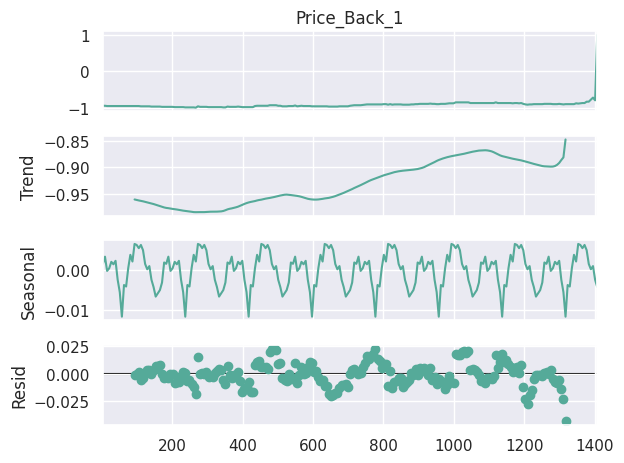

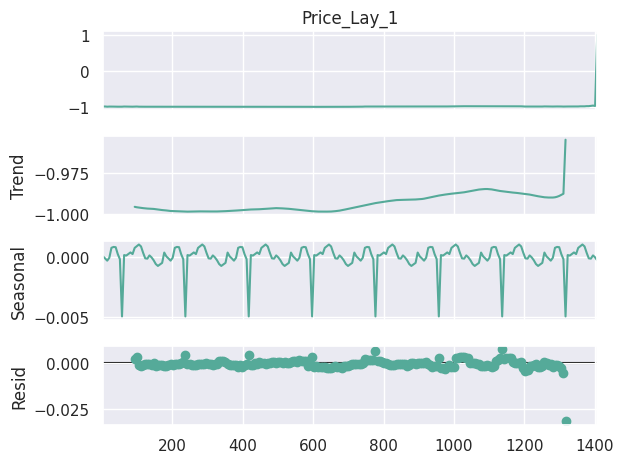

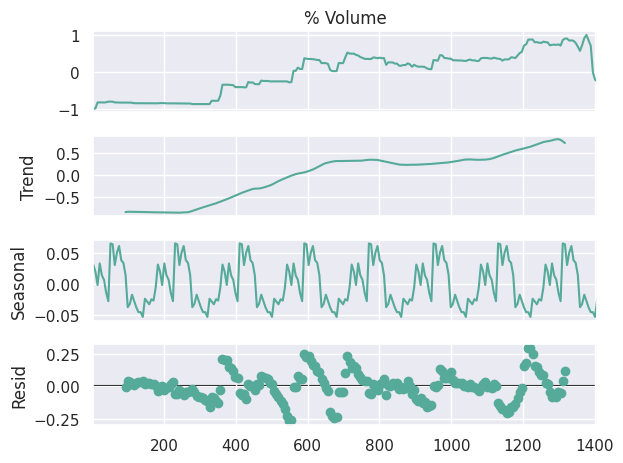

In [418]:
# seasonal decompose
print('Seasonal Decompose:\n\n')
for n in ['Price_Back_1', 'Price_Lay_1', '% Volume']:
    print(n)
    result = seasonal_decompose(choosed_set[n], model='additive', period=30,)
    result.plot()
plt.show()


# Result
## Price Back
We can observe from the first and second graphs of the price back that it is a monotonically increasing time series with a well-defined seasonal pattern.
## Price Lay
Similar to the price back series, the price lay series is monotonically increasing. However, 
$$\frac{\Delta B}{\Delta t}>\frac{\Delta L}{\Delta t}$$ indicating that the price back $B(t)$ varies more over time than the second.
## Volume
Here, we encounter the same cases as those we've seen before. This is somehow related to the variation rate of the first two series.

Analyzing the thing we discovered until now, we can imagine the $V(t)$ series as a funcion of the price back and price lay:
$$V\left(t\right)=V\left(B\left(t\right), L\left(t\right)\right)$$ 
This can be a key to understanding how the lay and back prices influence the volume, understanding how V varies when B pr P varies due to increasing time
$$\frac{dV}{dt}=\frac{\partial V}{\partial B}\frac{dB}{dt}+\frac{\partial V}{\partial L}\frac{dL}{dt}$$

# Autocorrelation
Autocorrelation refers to the correlation between a data point and its past values at different time lags. It measures how closely a time series is related to itself over time, indicating patterns, trends, or dependencies within the sequence. Positive autocorrelation implies a tendency for values to follow similar patterns, while negative autocorrelation suggests an inverse relationship between current and past values.

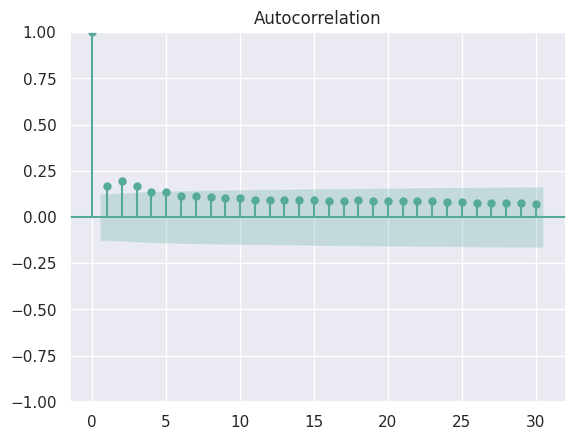

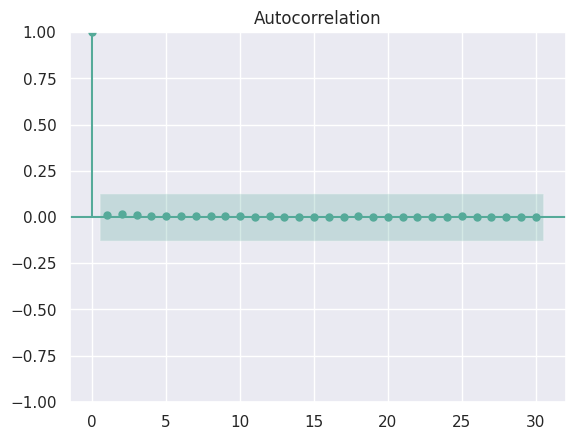

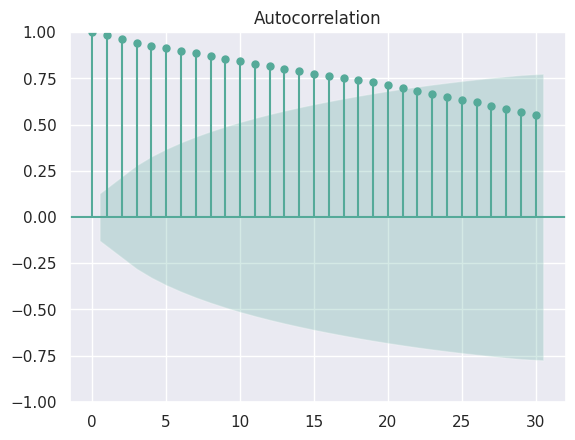

In [419]:
interest_columns = ['Price_Back_1', 'Price_Lay_1', '% Volume']
# ACF and PACF
for n in interest_columns:
    plot_acf(choosed_set[n], lags=30)
plt.show()

I'm just showing some tools we can use to assert with more precision the solution of our problem (discover the relation between this 3 series)

# Forecasting Data
We can use the ARIMA (AutoRegressive Integrated Moving Average) as our forecasting method

In [420]:
# model ARIMA
models = {}
# choosed_set.set_index('Time', inplace=True)
for n in interest_columns:
    models[n] = ARIMA(choosed_set[n], order=(1,1,1))

/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-p

In [421]:
for name in interest_columns:
    models[name] = models[name].fit()
models

/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'Price_Back_1': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7f0c94659350>,
 'Price_Lay_1': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7f0c94477990>,
 '% Volume': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7f0c944df990>}

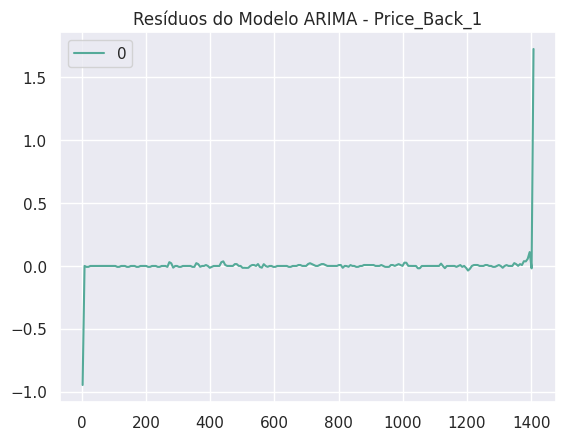

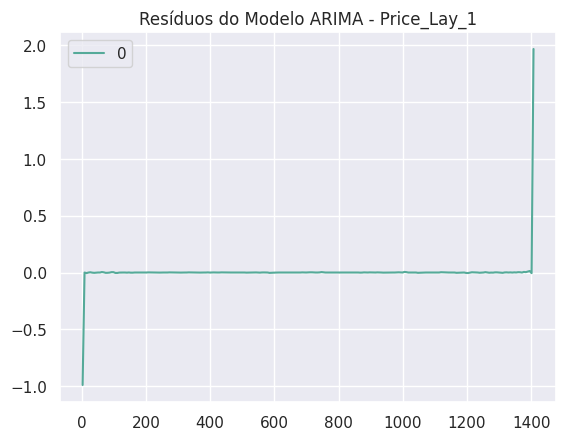

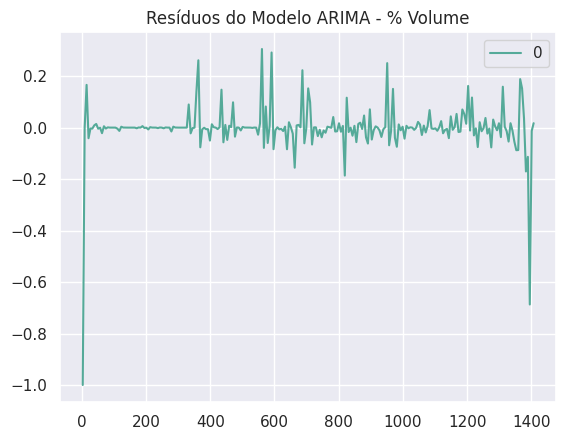

In [422]:
for n in interest_columns:
    residuals = pd.DataFrame(models[n].resid)
    residuals.plot(title=f'Resíduos do Modelo ARIMA - {n}')
plt.show()

In [423]:
choosed_set.set_index('Time', inplace=True,)

In [424]:
forecast_steps = 30
forecasts = {}
forecasts_index = {}
forecasts_values = {}
for n in interest_columns:
    forecasts[n] = models[n].get_forecast(steps=forecast_steps)
    forecasts_index[n] = pd.date_range(start=choosed_set.index[-1], periods=forecast_steps + 1, freq='3T')[1:]
    forecasts_values[n] = forecast.predicted_mean.values


/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/marcos/Documents/upwork/Nathan/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction re

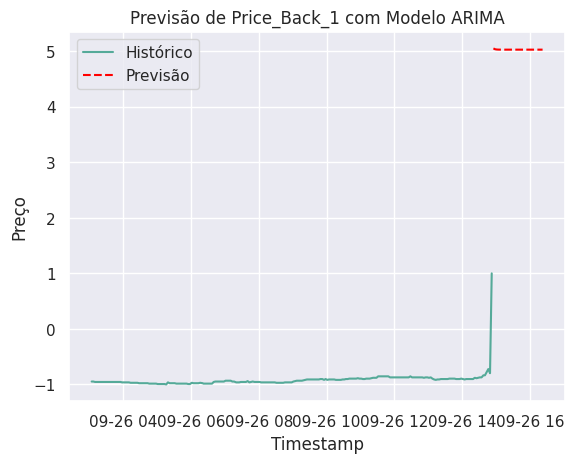

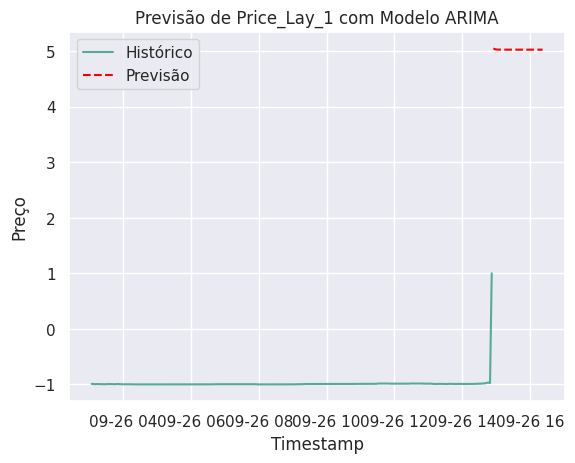

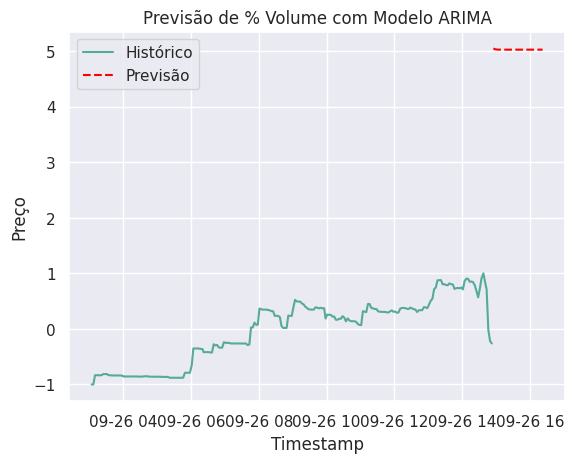

In [425]:
for n in interest_columns:
    sns.lineplot(data=choosed_set[n], label='Histórico')
    sns.lineplot(x=forecasts_index[n], y=forecasts_values[n], label='Previsão', linestyle='--', color='red')
    plt.title(f'Previsão de {n} com Modelo ARIMA')
    plt.xlabel('Timestamp')
    plt.ylabel('Preço')
    plt.legend()
    plt.show()

## What all this means?

Some of the parameters we pass to the model when it is fitting are derived from the relationships between the columns for each new set of data acquired every 3min.


The results above are not refined; this is just an example of how I could address the problem with Time Series 
# Statistical Inference
Alternatively, we can perform a correlation analysis over time to determine how the volume is affected by the price lay/back. Firstly, we need to understand how the correlation between these quantities varies with time. In other words, does the correlation between the prices change over time? Can we mitigate this variation in correlation? How can we ensure the accuracy of these quantities?

For example, let's plot the correlation heatmap for all the data acquired from the set you provided:

Price_Back_1  Price_Lay_1  % Volume
Price_Back_1      1.000000     0.954542  0.211316
Price_Lay_1       0.954542     1.000000 -0.003061
% Volume          0.211316    -0.003061  1.000000

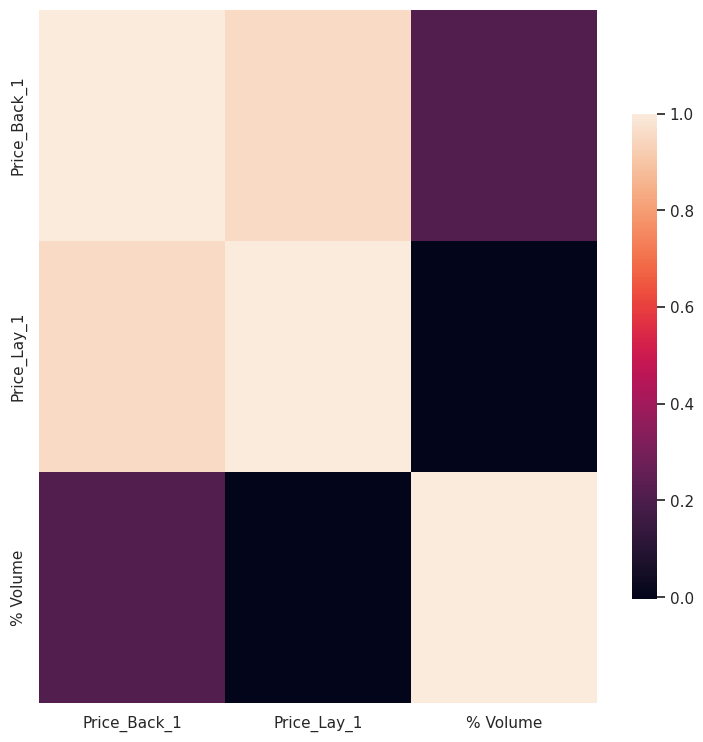

In [428]:
corr = choosed_set.corr()
f, ax = plt.subplots(figsize=(9,9))

cmap = sns.diverging_palette(210, 20, as_cmap=True)
sns.heatmap(corr,  cbar_kws={"shrink": .7})

Note that the correlation, denoted as $\sigma_{xy}$, varies within an interval between 0 and 1. The more the variables are correlated, the closer the correlation will approach 1.

In the case above, for the volume and Price Back 1, we have $\sigma_{VB}\approx 0.21$, for volume and Price Lay 1, $\sigma_{BL}\approx 0$, and for Price Lay and Back, $\sigma_{BL}\approx 0.95". This implies that the prices are strongly correlated, as expected, and the correlation between these prices and volume is weak. However, it's important to note that this correlation can vary when examined over shorter intervals of time.

Let's plot the graphs for five intervals of 30 minutes each.

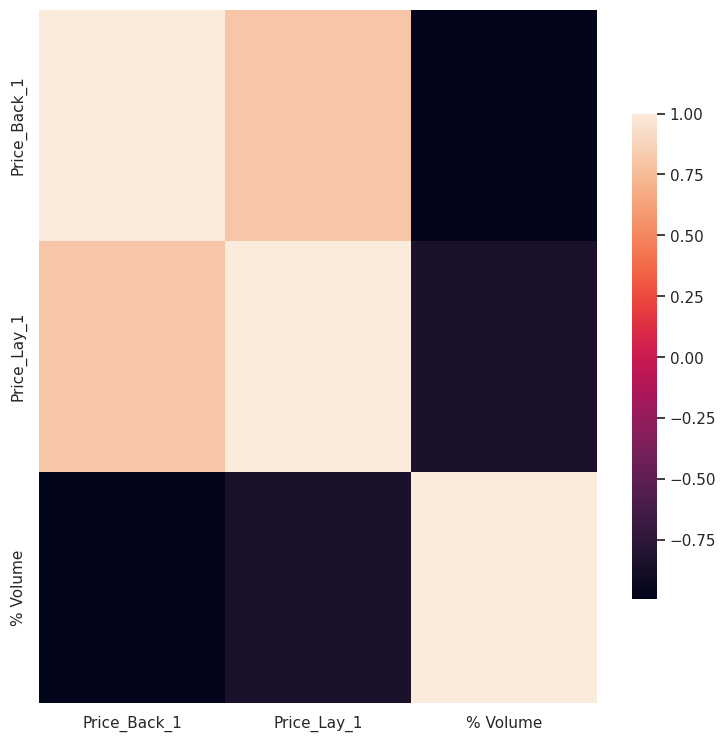

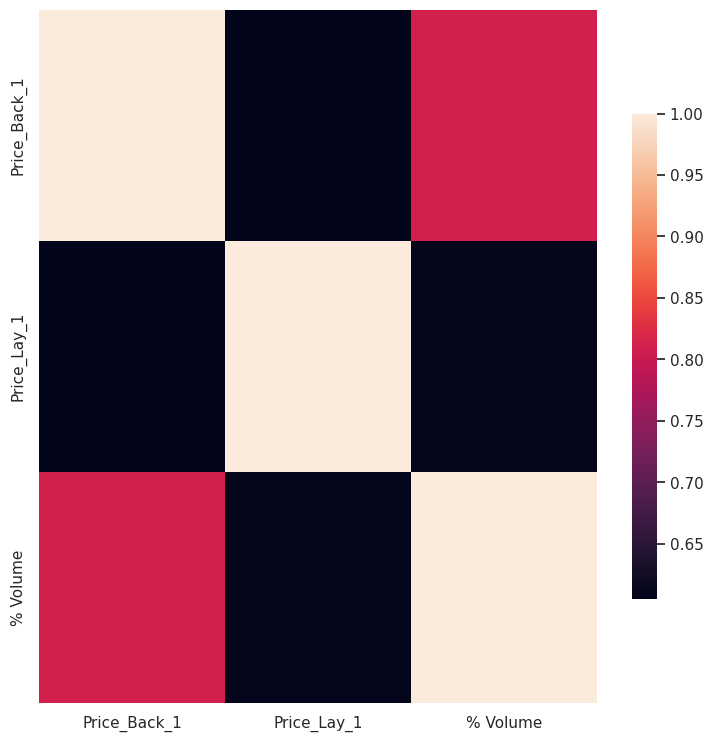

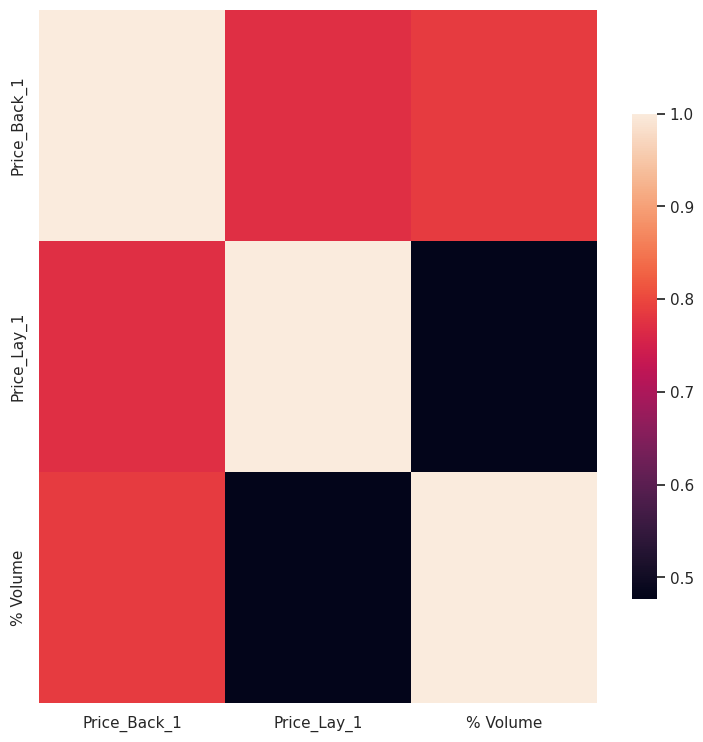

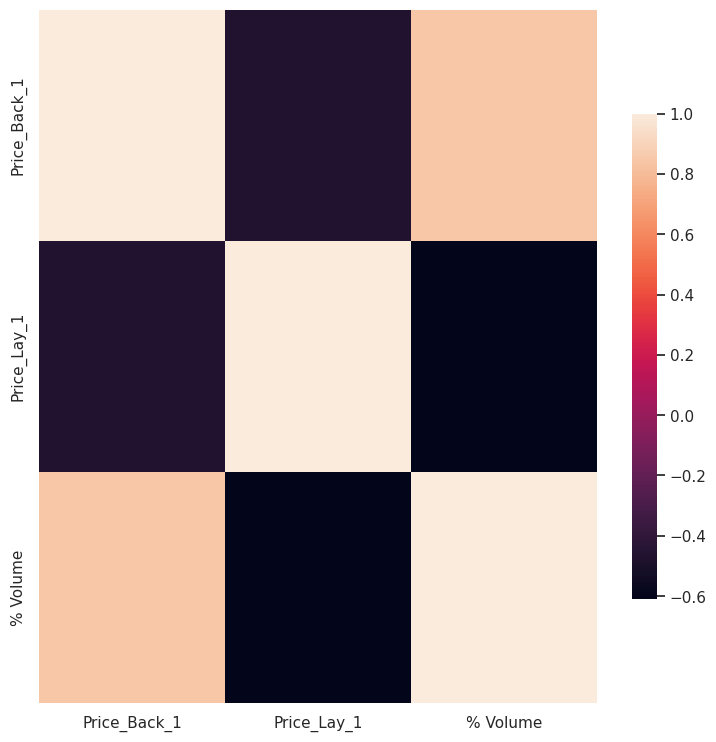

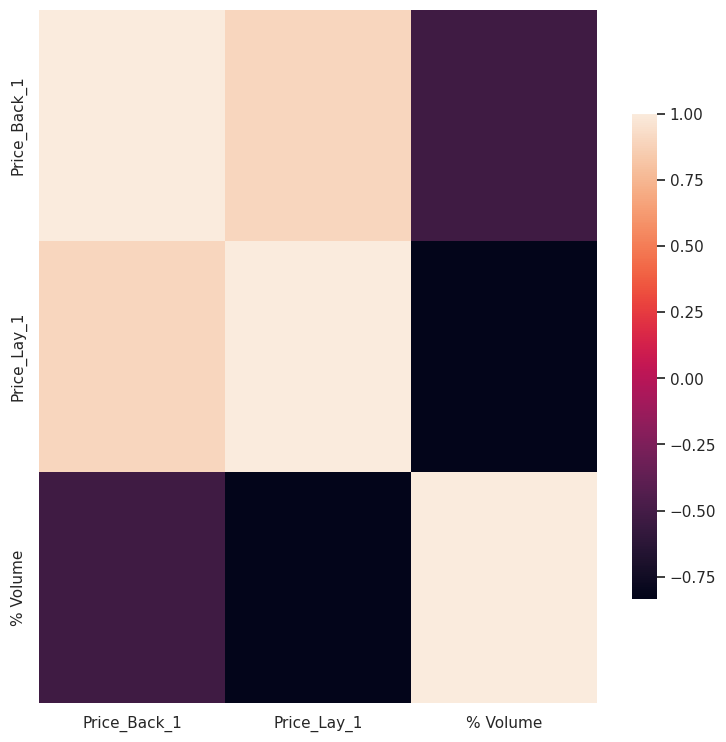

In [446]:
corr_data = []

for n in range(5):
    f, ax = plt.subplots(figsize=(9,9))
    corr = choosed_set.iloc[n*10:(n+1)*10,:].corr()
    sns.heatmap(corr,  cbar_kws={"shrink": .7})


In this view of the data, we observe that the correlation between Price Back and Volume is consistently larger than the correlation between Price Lay and Volume. If we can establish that these variables are related, we can formulate a linear equation that will, with a certain level of precision, provide forecasts without the complexities associated with the time series elements I explained at the beginning.

But this is a hypothesis; we need to investigate and validate this theory before starting to provide an API for predictions. Just as in time series analysis, we must thoroughly understand all the points I raised.